## 🍃 Análise da base de dados que contém informações sobre solo e temperatura relacionados a tipos de plantações

O presente documento jupyter notebook tem como objetivos realizar análises exploratórias e descritivas assim como desenvolver modelos preditivos buscando a melhorar performance.

A obtenção dos dados já foi realizada e disponibilizada, e se encontra no arquivo estruturado chamado: Atividade_Cap_14_produtos_agricolas.csv.

### 🍀 Características dos dados:

1. Fonte: **dados terciários**, pois são dados disponibilizados publicamente.
2. Granularidade: **dados desagregados**, pois são dados brutos e individuais.
3. Estrutura: **dados estruturados**, pois são dados organizados em coluna (variáveis) e linhas (valores).
4. Tipo: **dados numéricos e categóricos**
   1. Valores discretos nas colunas: N, P e K
   2. Valores contínuos nas colunas: temperature, humidity, ph e rainfall
   3. Valores nominais na coluna label

### 🌸 Definição dos dados:

O arquivo Atividade_Cap_14_produtos_agricolas.csv possui 8 colunas, das quais:

* N: quantidade de nitrogênio no solo
* P: quantidade de fósforo no solo
* K: quantidade de potássio no solo
* temperature: temperatura média da região em graus Celsius
* humidity: umidade média do ar na região
* ph: pH do solo
* rainfall: precipitação em milímetros
* label: tipo de cultura plantada nas condições daquela linha

### 💥 Pipeline para realização da modelagem:

Como os dados já foram obtidos, seguiremos para:

1. Limpeza dos dados
2. Exploração dos dados
3. Engenharia de features
4. Modelagem preditiva
5. Visualização dos dados
6. Comparação dos 5 modelos

## 🔥 Pré-processamento dos dados:

Os códigos abaixo estarão relacionados a limpeza e exploração da base:

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


In [7]:
# Leitura do arquivo para mostrar informações do tipo de cada variável, quantidade de linhas e colunas
path = r"Atividade_Cap_14_produtos_agricolas.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# As 5 primeiras linhas do arquivo
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
#Pegando informações estatísticas sobre a base
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


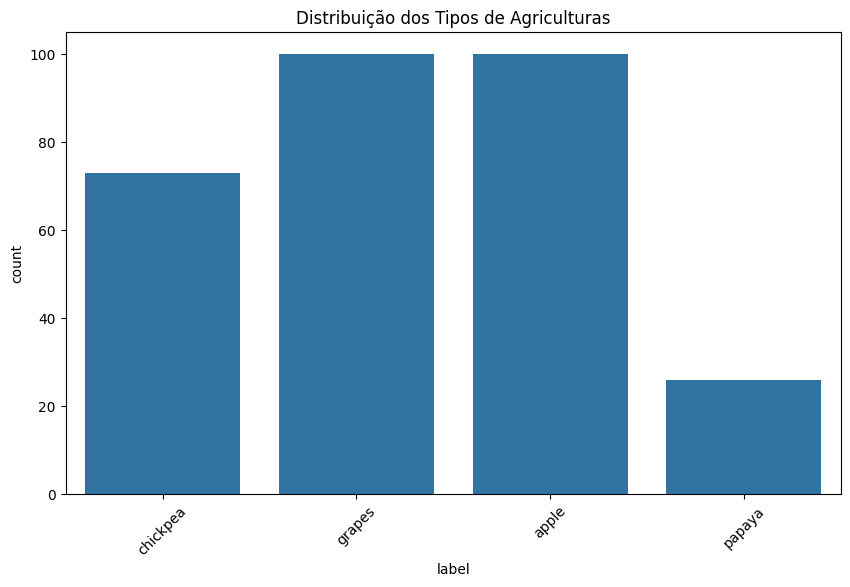

In [10]:
#Algorítmo para encontrar o perfil ideal e os produtos
mean_P = 53.362727
std_P = 32.985883

P_min = mean_P - std_P
P_max = mean_P + std_P

df_ideal_profile = df[(df['P'] >= mean_P)]

mean_K = 48.149091
std_K = 50.647931

K_min = mean_K - std_K
K_max = mean_K + std_K

df_ideal_profile = df_ideal_profile[(df_ideal_profile['K'] >= mean_K)]

mean_N = 50.551818
std_N = 36.917334

N_min = mean_N - std_N
N_max = mean_N + std_N

df_ideal_profile = df_ideal_profile[(df_ideal_profile['N'] <= mean_N)]

# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_ideal_profile)
plt.title("Distribuição dos Tipos de Agriculturas")
plt.xticks(rotation=45)
plt.show()

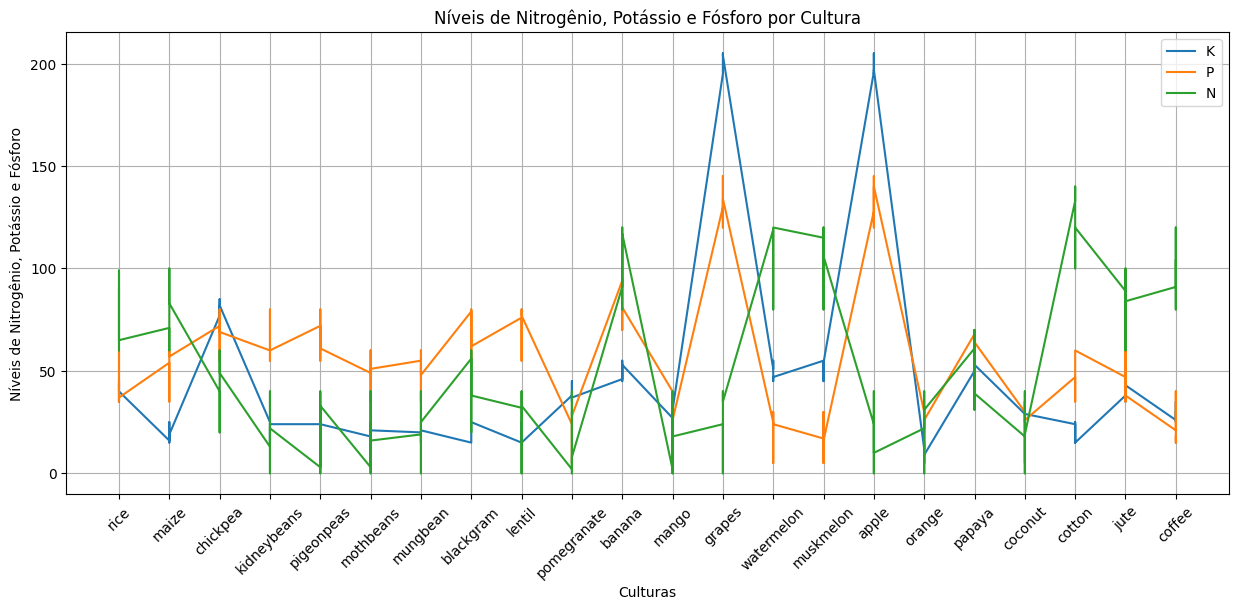

In [11]:
#gráfico comparativo para identificar os níveis de Nitrogênio, Potássio e Fósforo de cada cultura.
coluna_x = 'label'
colunas_y = ['K', 'P', 'N']

plt.figure(figsize=(15,6))
for i in colunas_y:
    plt.plot(df[coluna_x], df[i], label=[i])
plt.title('Níveis de Nitrogênio, Potássio e Fósforo por Cultura')
plt.xlabel('Culturas')
plt.ylabel('Níveis de Nitrogênio, Potássio e Fósforo')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [12]:
# Mostrar a quantidade de valores únicos em cada coluna
df.nunique()

# Existem 22 tipos de plantações diferentes na base

,0
N,137
P,117
K,73
temperature,2200
humidity,2200
ph,2200
rainfall,2200
label,22


In [13]:
# Mostrar a quantidade de valores nulos em casa coluna
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<Axes: >

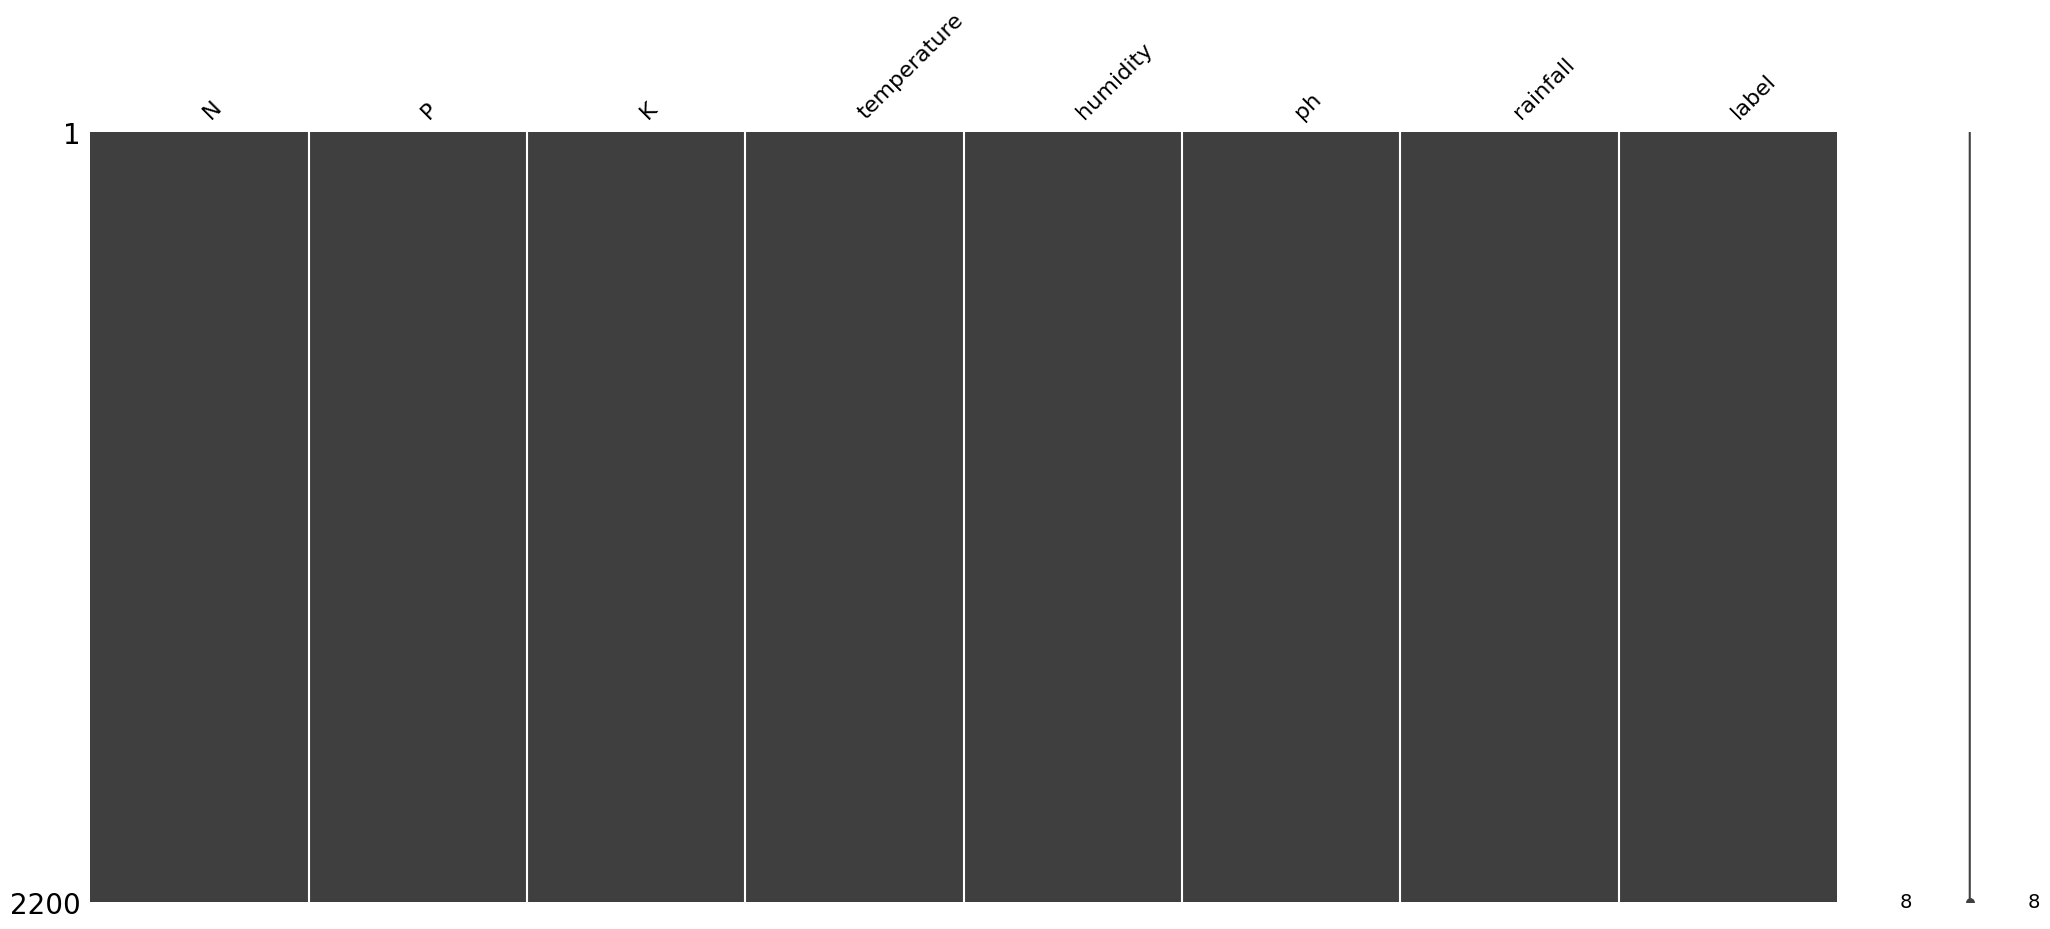

In [14]:
import missingno as mscno

#Visualizar dados faltantes
mscno.matrix(df)

**Análise do gráfico acima**: não há dados faltantes.

In [15]:
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


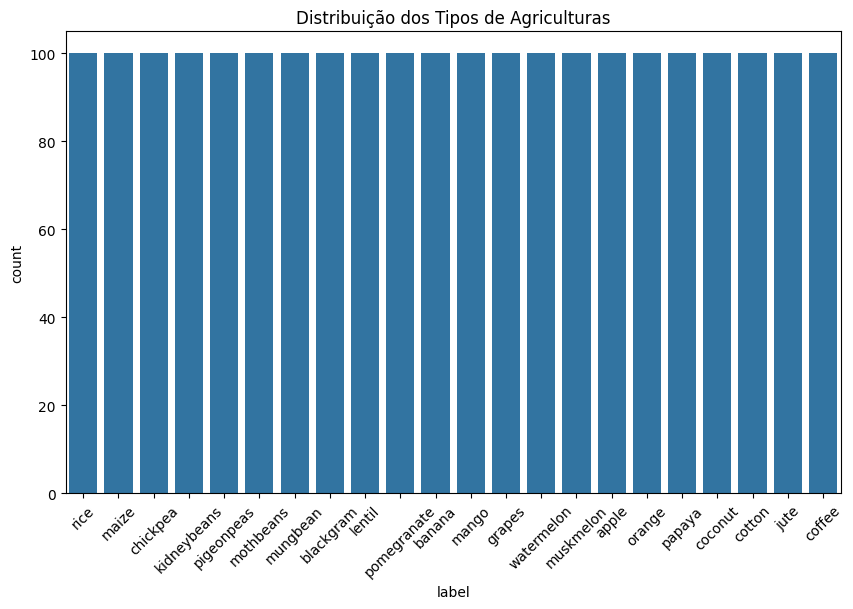

In [16]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title("Distribuição dos Tipos de Agriculturas")
plt.xticks(rotation=45)
plt.show()

**Análise do gráfico acima**: Existem 22 tipos diferentes de agriculturas, distribuidas uniformemente em 100 recorrências. Esse é um problema de classificação multiclasse.

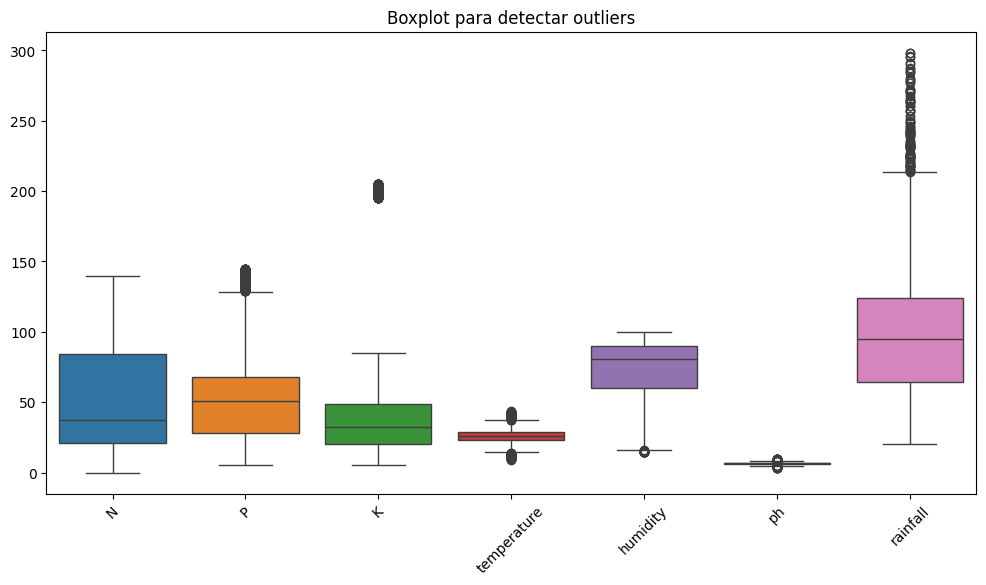

In [17]:
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

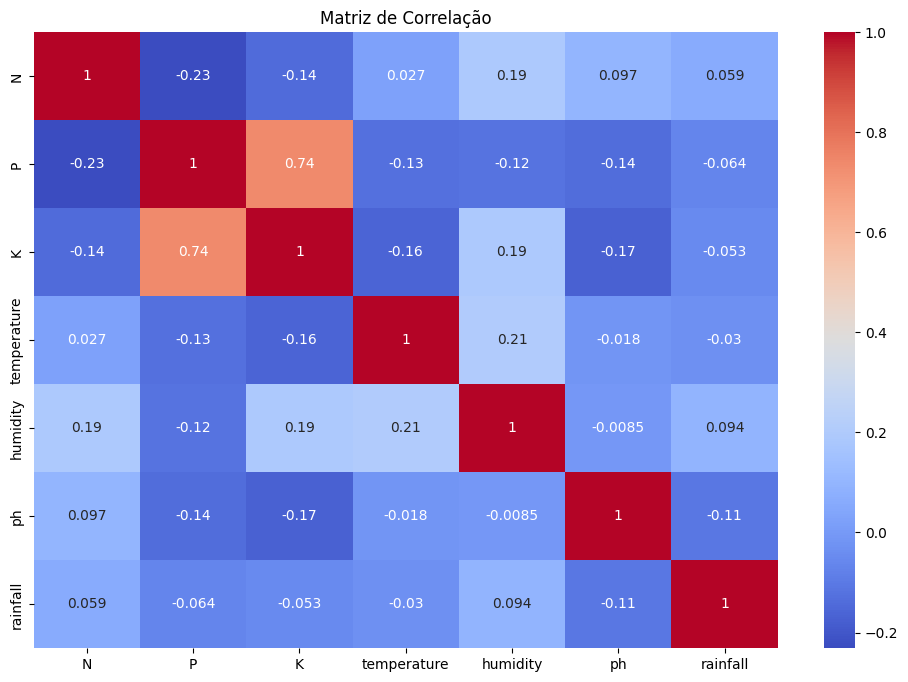

In [18]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

**Análise do gráfico de outliers**: somente o Nitrogênio (coluna N) não tem dados outliers.

**Matrix do correlação**: para avaliar a correlação entre as variáveis numéricas.

Nota-se uma alta correlação entre as variáveis: "P (fósforo) e K (potássio)" e "K (potássio) e ph".

In [19]:
# Tratar outliers, se necessário (substituir por média, mediana, etc.)

# Substituindo outliers do Fósforo pela média
df['P'] = df['P'].apply(lambda x: df['P'].mean() if x > df['P'].quantile(0.975) or x < df['P'].quantile(0.025) else x)
# Substituindo outliers do potássio pela média
df['K'] = df['K'].apply(lambda x: df['K'].mean() if x > df['K'].quantile(0.975) or x < df['K'].quantile(0.025) else x)
# Substituindo outliers da temperatura pela média
df['temperature'] = df['temperature'].apply(lambda x: df['temperature'].mean() if x > df['temperature'].quantile(0.975) or x < df['temperature'].quantile(0.025) else x)
# Substituindo outliers da umidade pela média
df['humidity'] = df['humidity'].apply(lambda x: df['humidity'].mean() if x > df['humidity'].quantile(0.975) or x < df['humidity'].quantile(0.025) else x)
# Substituindo outliers do ph pela média
df['ph'] = df['ph'].apply(lambda x: df['ph'].mean() if x > df['ph'].quantile(0.975) or x < df['ph'].quantile(0.025) else x)
# Substituindo outliers da precipitação pela média
df['rainfall'] = df['rainfall'].apply(lambda x: df['rainfall'].mean() if x > df['rainfall'].quantile(0.975) or x < df['rainfall'].quantile(0.025) else x)

df.shape

(2200, 8)

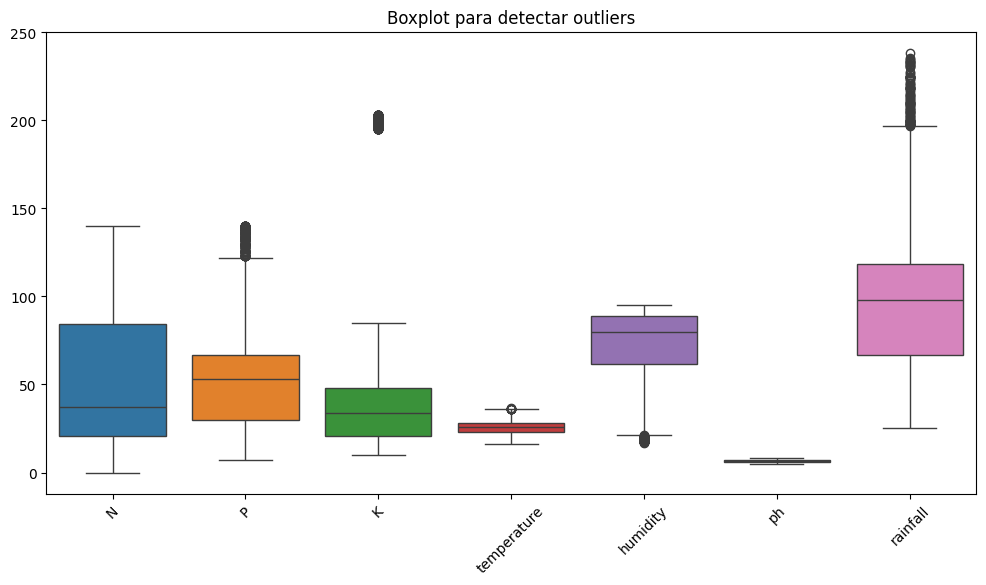

In [20]:
#Gráfico para mostrar os outliers após o tratamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

### ⭐ Conclusão sobre a limpeza da base:

Não há valores nulos e nem duplicados, no entanto existiam ouliers nos dados numéricos que foram tratados.

### 🌻 Engenharia de features

Finalizada a exploração a limpeza da base, inicia-se a Engenhria de features, onde serão realizados:

1. Separação das features (X) das labels (Y).
2. Transformação da label, que é uma string, em número.
4. Separação dos dados em treino (80%) e teste (20%).
5. Normalização das features numéricas.
   

In [21]:

# Separando features e labels
X = df.drop('label', axis=1)
y = df['label']

# Label Encoder para a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)
y

array([20, 20, 20, ...,  5,  5,  5])

In [22]:
#Dividindo os dados em conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das features numéricas
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 🎉 Modelos Preditivos

Como a base de dados possui uma label, ou seja, um rótulo, serão utilizados modelos supervisionados.
Com os dados normalizados e já separados para treinamento e teste, abaixo têm-se a aplicação dos modelos:

1. KNN, com o valor de k=9.
2. DecisionTree
3. SVM com kernel rbf


In [23]:
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))

Acurácia KNN: 0.9295454545454546


In [24]:
print(confusion_matrix(y_test, y_pred_knn))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  3  0  1 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [25]:
# DecisionTree
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_decisiontree_predict = decisiontree.predict(X_test)
decisiontree_accuracy = accuracy_score(y_test, y_decisiontree_predict)
print(f"Acurácia Árvore de Decisão: {decisiontree_accuracy}")

Acurácia Árvore de Decisão: 0.9931818181818182


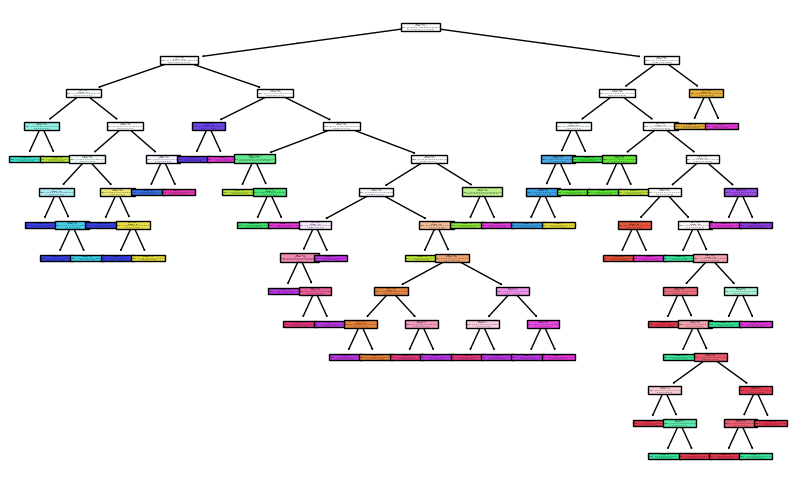

In [27]:
plt.figure(figsize=(10,6))
plot_tree(decisiontree, feature_names=X.columns, filled = True)
plt.show()

In [28]:
scale_svc = StandardScaler()

svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [29]:
y_svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_svc_predict)
print(f"Acurácia do SVC: {svc_accuracy}")

Acurácia do SVC: 0.95


In [30]:
print(confusion_matrix(y_test, y_svc_predict))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  2  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [44]:
# Random Forest
# A floresta aleatória (Random Forest) é um modelo baseado em múltiplas árvores de decisão que votam em conjunto para realizar a predição.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred_rf = rf_model.predict(X_test)
print("Acurácia da Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))


Acurácia da Random Forest: 0.9931818181818182

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
     

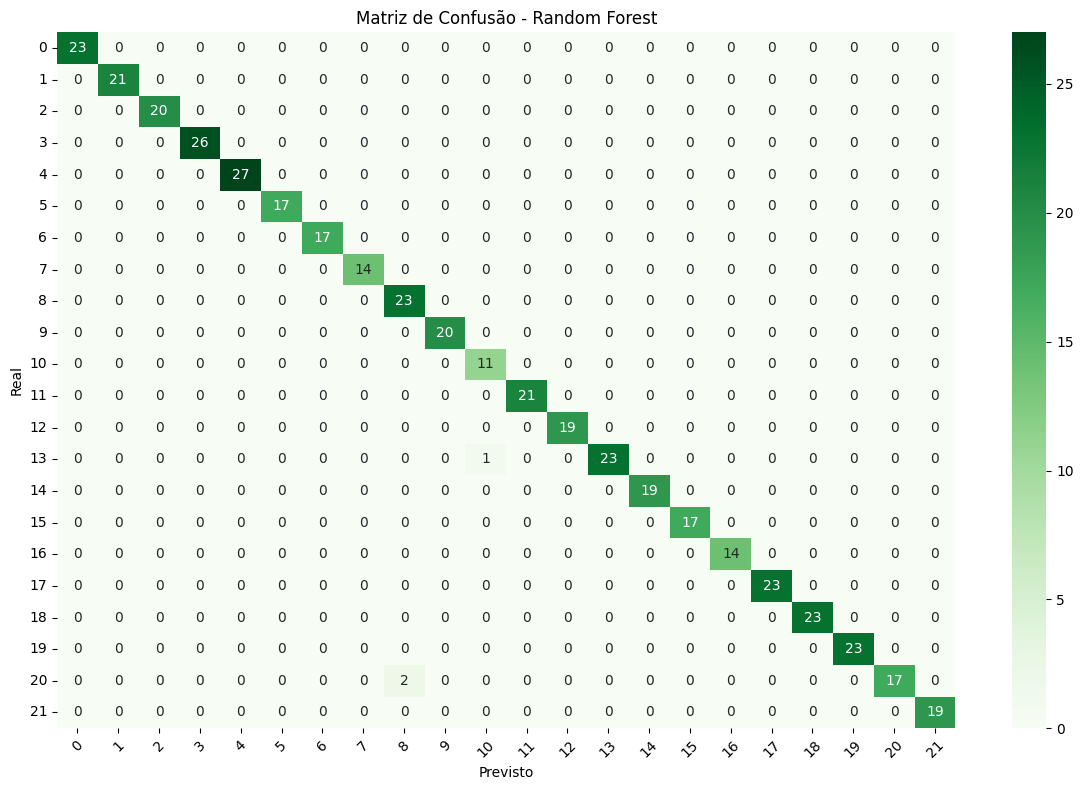

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-45-739240e75137>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


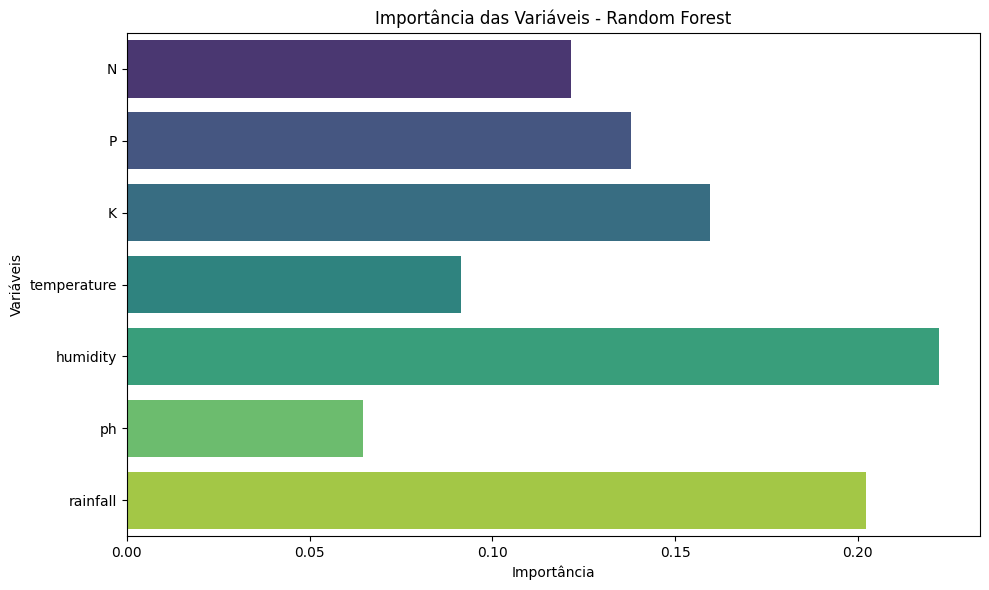

In [45]:
# Importância das variáveis
# Este gráfico mostra quais variáveis (ex: nitrogênio, pH, temperatura) têm maior influência na tomada de decisão do modelo. Isso ajuda a entender quais características do solo/clima mais impactam na recomendação da cultura.

importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

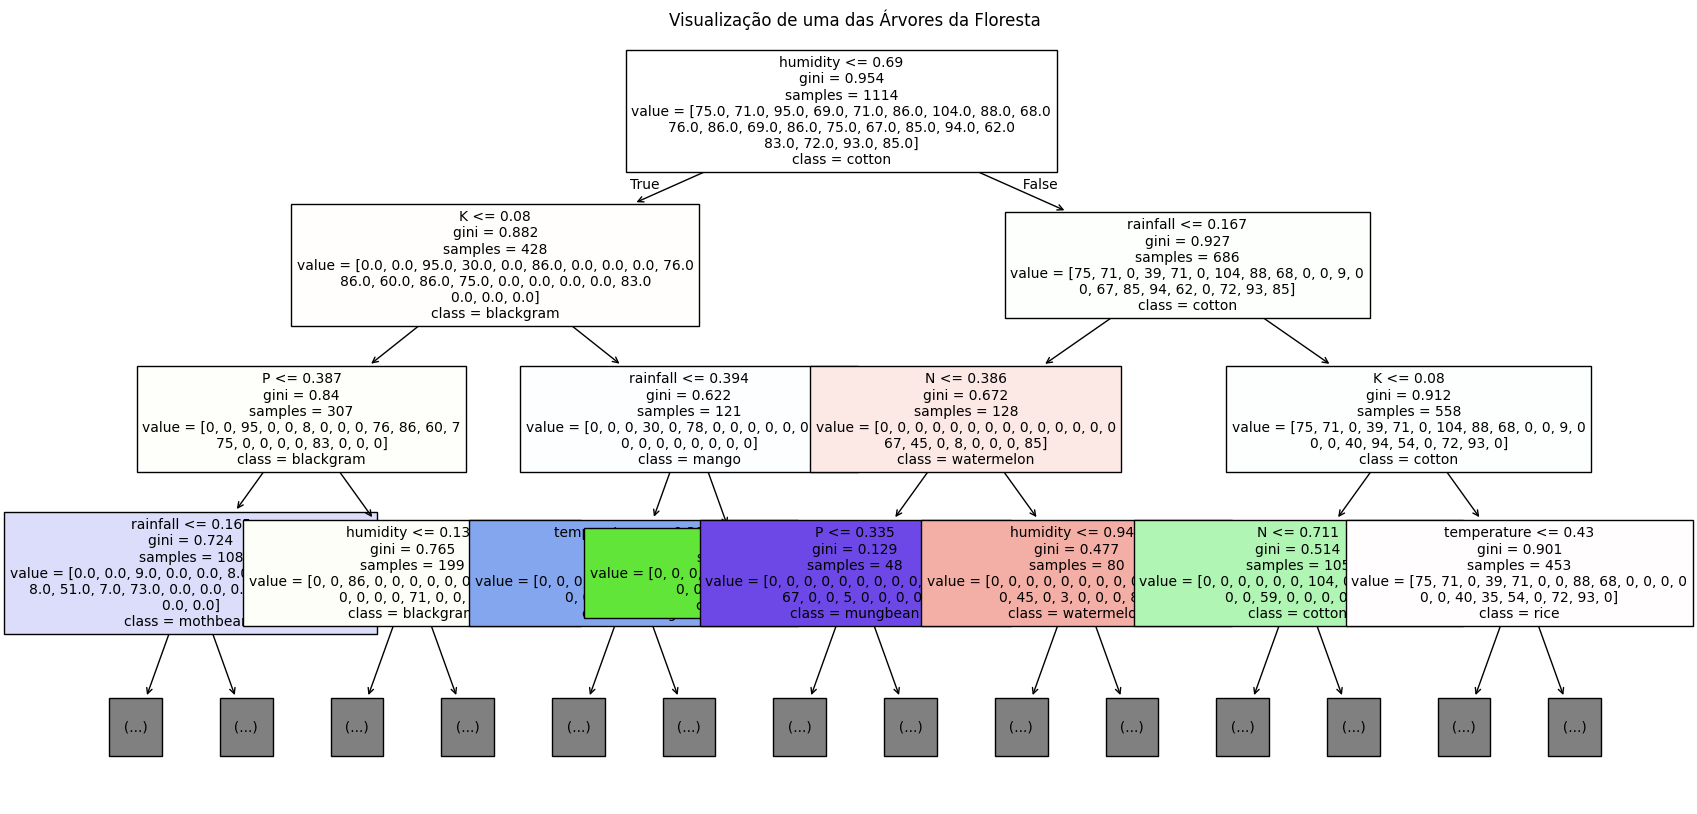

In [47]:
# 🌳 Visualizar uma árvore da floresta (apenas uma das 100)
plt.figure(figsize=(20, 10))
original_class_names = le.inverse_transform(rf_model.classes_)
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=original_class_names, filled=True, max_depth=3, fontsize=10)
plt.title("Visualização de uma das Árvores da Floresta")
plt.show()

In [38]:
# Logistic Regression
# A Regressão Logística é um modelo estatístico clássico usado para classificação. Embora originalmente binária, ela pode ser adaptada para múltiplas classes, como no nosso caso. A seguir, aplicamos esse modelo para prever o tipo de produto agrícola a partir das condições de solo e clima.

logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [39]:
y_pred_logreg = logreg.predict(X_test)
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

Acurácia da Regressão Logística: 0.8681818181818182

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.83      0.95      0.88        20
           3       1.00      1.00      1.00        26
           4       1.00      0.81      0.90        27
           5       0.94      1.00      0.97        17
           6       0.81      1.00      0.89        17
           7       1.00      0.93      0.96        14
           8       0.61      0.61      0.61        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.95      0.98        21
          12       0.79      1.00      0.88        19
          13       1.00      0.62      0.77        24
          14       0.86      1.00      0.93        19
          15       0.94      1.00      0.97        17

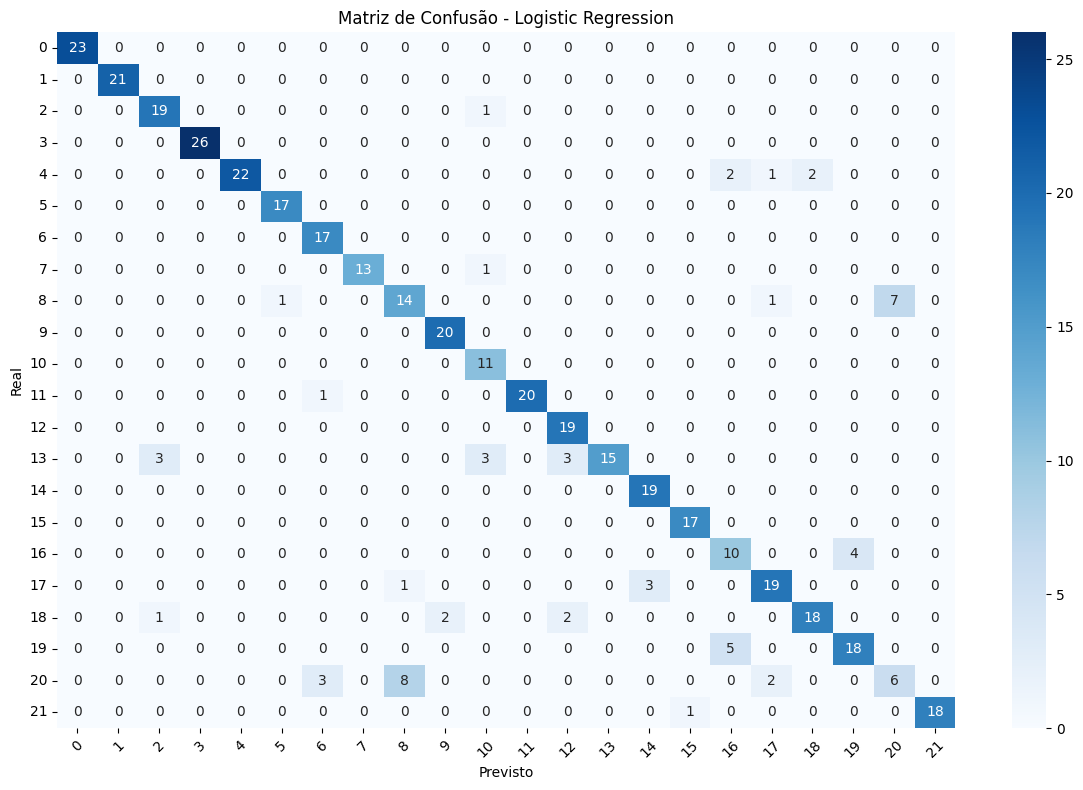

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

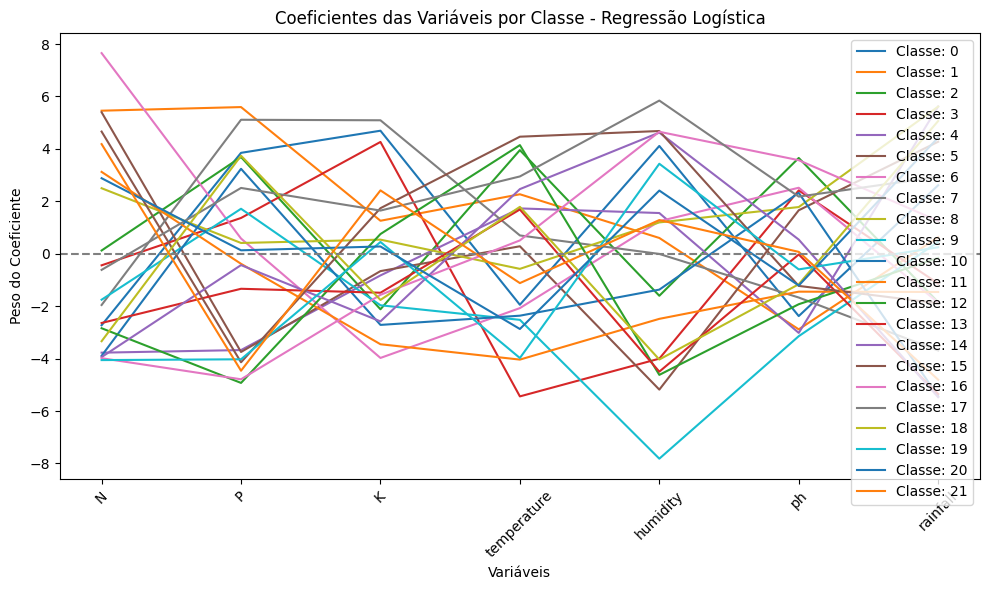

In [46]:
# Coeficientes das Variáveis por Classe
# Este gráfico mostra como cada variável influencia na probabilidade de uma amostra ser classificada em determinada classe. Valores positivos indicam aumento na chance de pertencer àquela cultura, enquanto valores negativos indicam o contrário.

plt.figure(figsize=(10, 6))
coef_matrix = logreg.coef_
for i in range(coef_matrix.shape[0]):
    sns.lineplot(x=X.columns, y=coef_matrix[i], label=f'Classe: {logreg.classes_[i]}')

plt.title("Coeficientes das Variáveis por Classe - Regressão Logística")
plt.ylabel("Peso do Coeficiente")
plt.xlabel("Variáveis")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()